In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
dataset = pd.read_csv('dataset.csv') 
dataset.head()

,track,artist,uri,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_ms,time_signature,chorus_hit,sections,target
0,Wild Things,Alessia Cara,spotify:track:2ZyuwVvV6Z3XJaXIFbspeE,0.741,0.626,1,-4.826,0,0.0886,0.02000,0.000,0.0828,0.706,108.029,188493,4,41.18681,10,1
1,Surfboard,Esquivel!,spotify:track:61APOtq25SCMuK0V5w2Kgp,0.447,0.247,5,-14.661,0,0.0346,0.87100,0.814,0.0946,0.250,155.489,176880,3,33.18083,9,0
2,Love Someone,Lukas Graham,spotify:track:2JqnpexlO9dmvjUMCaLCLJ,0.550,0.415,9,-6.557,0,0.0520,0.16100,0.000,0.1080,0.274,172.065,205463,4,44.89147,9,1
3,Music To My Ears (feat. Tory Lanez),Keys N Krates,spotify:track:0cjfLhk8WJ3etPTCseKXtk,0.502,0.648,0,-5.698,0,0.0527,0.00513,0.000,0.2040,0.291,91.837,193043,4,29.52521,7,0
4,Juju On That Beat (TZ Anthem),Zay Hilfigerrr & Zayion McCall,spotify:track:1lItf5ZXJc1by9SbPeljFd,0.807,0.887,1,-3.892,1,0.2750,0.00381,0.000,0.3910,0.780,160.517,144244,4,24.99199,8,1


In [3]:
dataset.shape

(6398, 19)

In [4]:
dataset.target.value_counts()

1    3199
0    3199
Name: target, dtype: int64

## Análise Exploratória

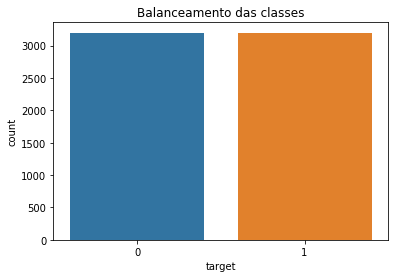

In [5]:
sns.countplot(x=dataset.target)
plt.title('Balanceamento das classes')
plt.show()

In [6]:
features_with_na = [ feature for feature in dataset.columns if dataset[feature].isnull().sum() >1] 
features_with_na

[]

In [7]:
dataset.isnull().sum() #sem valores nulos

track               0
artist              0
uri                 0
danceability        0
energy              0
key                 0
loudness            0
mode                0
speechiness         0
acousticness        0
instrumentalness    0
liveness            0
valence             0
tempo               0
duration_ms         0
time_signature      0
chorus_hit          0
sections            0
target              0
dtype: int64

In [8]:
numerical_feature = [ feature for feature in dataset.columns if dataset[feature].dtypes != "O"] 
numerical_feature

['danceability',
 'energy',
 'key',
 'loudness',
 'mode',
 'speechiness',
 'acousticness',
 'instrumentalness',
 'liveness',
 'valence',
 'tempo',
 'duration_ms',
 'time_signature',
 'chorus_hit',
 'sections',
 'target']

In [9]:
discrete_feature = [feature for feature in numerical_feature if len(dataset[feature].unique()) <15] 
discrete_feature

['key', 'mode', 'time_signature', 'target']

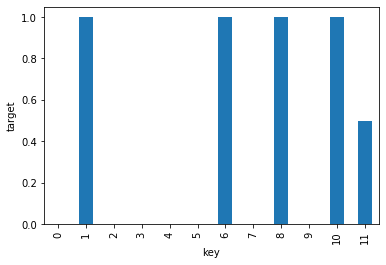

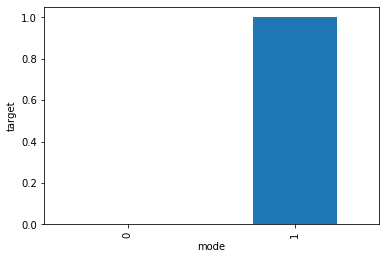

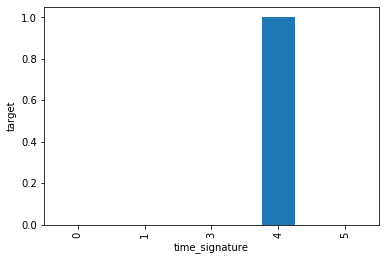

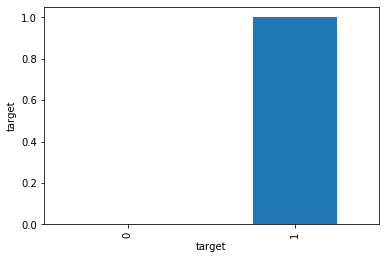

In [10]:
for feature in discrete_feature:
    data = dataset.copy()
    data.groupby(feature)["target"].median().plot.bar()
    plt.xlabel(feature)
    plt.ylabel("target")
    plt.show()

In [11]:
continuous_feature = [feature for feature in numerical_feature if feature not in discrete_feature]
continuous_feature

['danceability',
 'energy',
 'loudness',
 'speechiness',
 'acousticness',
 'instrumentalness',
 'liveness',
 'valence',
 'tempo',
 'duration_ms',
 'chorus_hit',
 'sections']

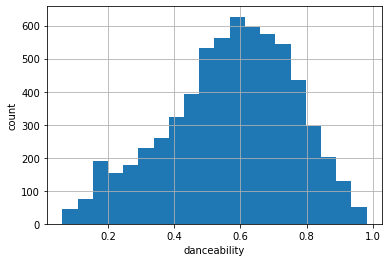

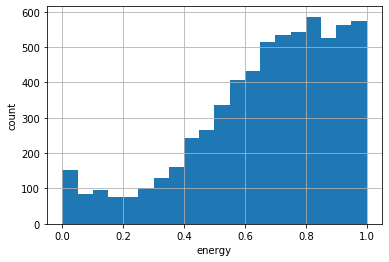

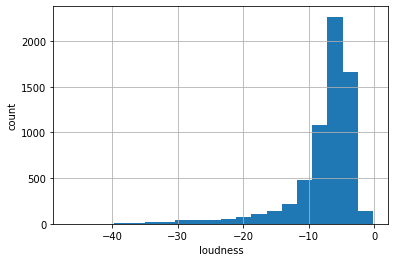

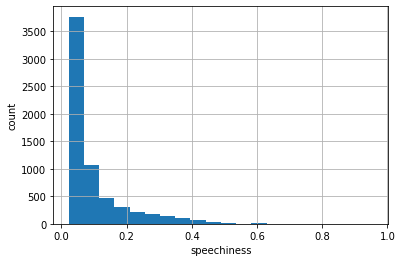

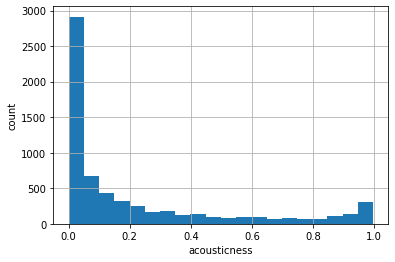

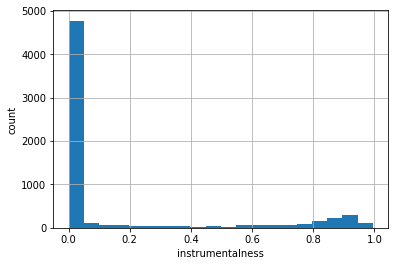

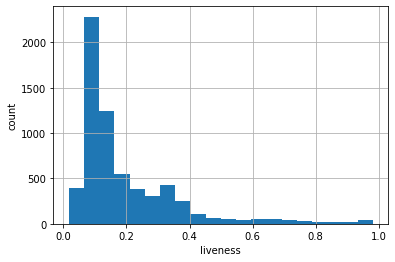

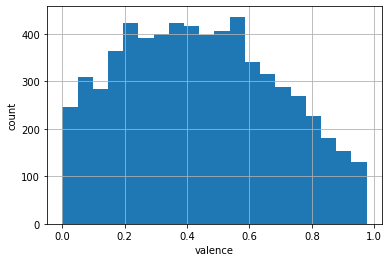

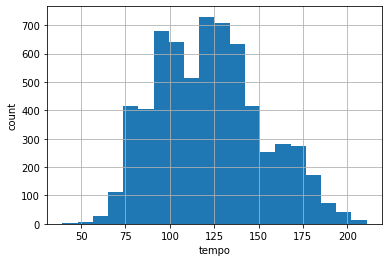

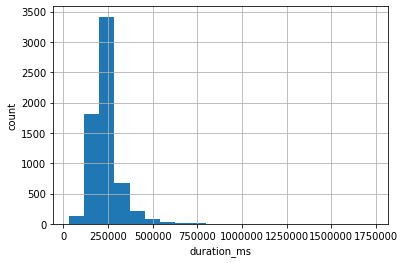

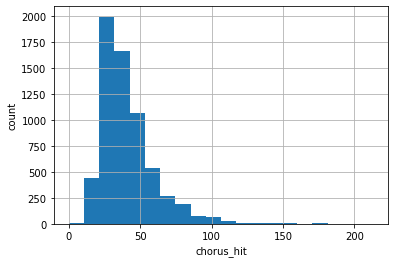

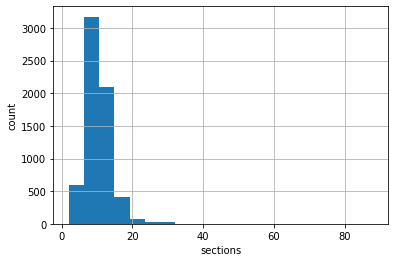

In [12]:
for feature in continuous_feature: 
    data = dataset.copy()
    data[feature].hist(bins=20)
    plt.xlabel(feature)
    plt.ylabel("count")
    plt.show()

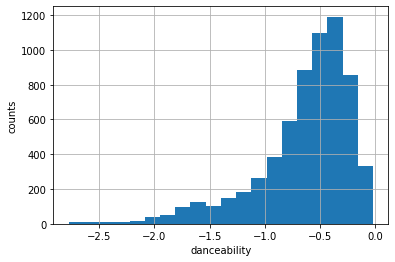

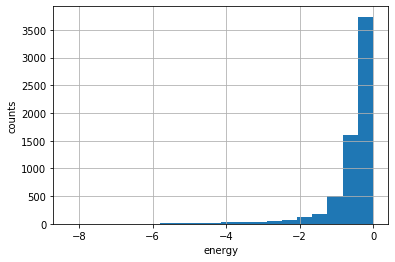

C:\Users\Alane\anaconda3\lib\site-packages\pandas\core\series.py:679: RuntimeWarning: invalid value encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)


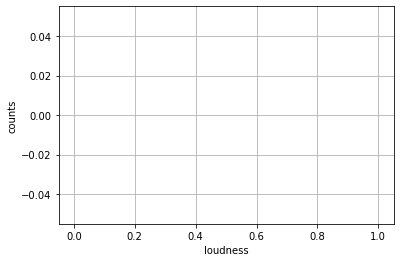

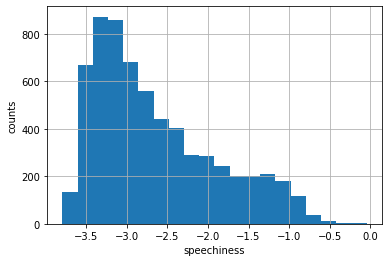

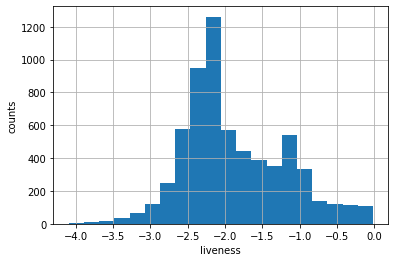

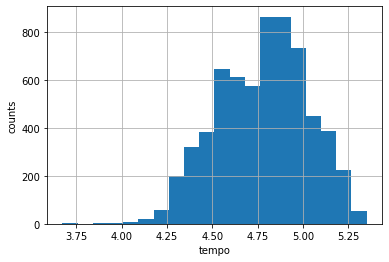

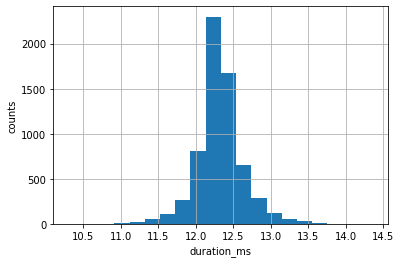

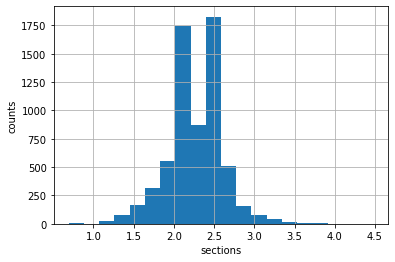

In [13]:
for feature in continuous_feature: 
    if 0 in data[feature].unique():
        pass
    else:
        data[feature] = np.log(data[feature])
        data[feature].hist(bins=20)
        plt.xlabel(feature)
        plt.ylabel("counts")
        plt.show()

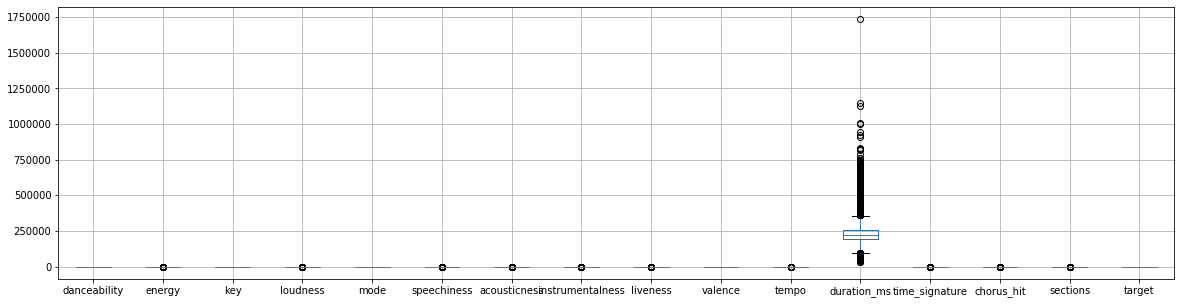

In [14]:
plt.figure(figsize=(20,5))
dataset.boxplot()
plt.show()

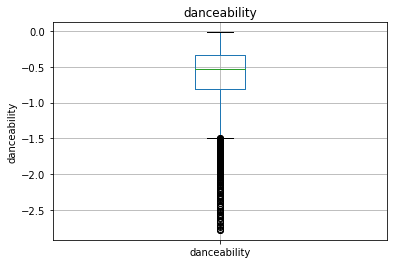

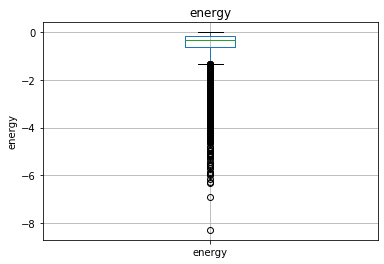

C:\Users\Alane\anaconda3\lib\site-packages\pandas\core\series.py:679: RuntimeWarning: invalid value encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)


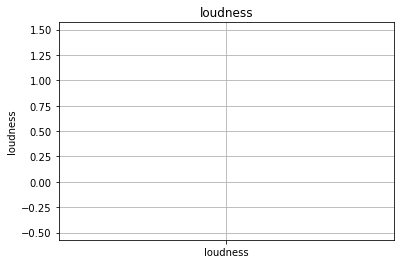

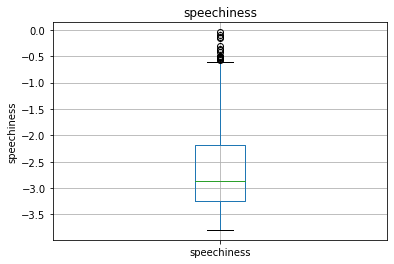

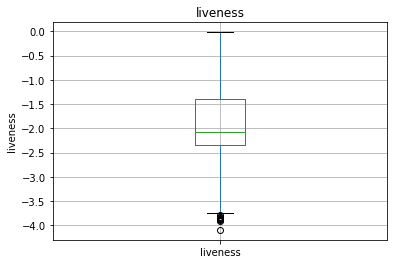

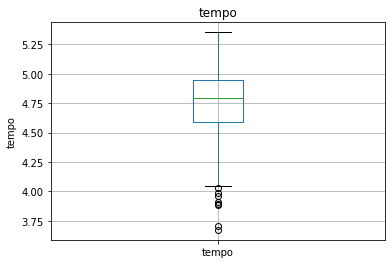

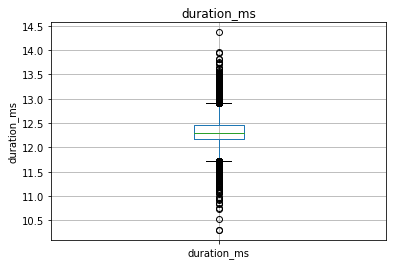

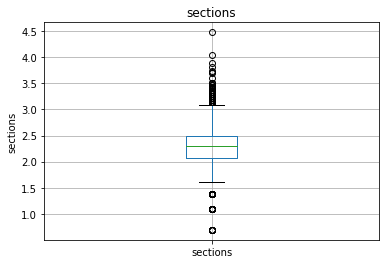

In [15]:
for feature in continuous_feature: #checando outliers
    data = dataset.copy()
    if 0 in data[feature].unique():
        pass
    else:
        data[feature] = np.log(data[feature])
        data.boxplot(column=feature)
        plt.ylabel(feature)
        plt.title(feature)
        plt.show()

In [16]:
categorical_features = [feature for feature in dataset.columns if dataset[feature].dtypes == "O"] #extraindo atributos categoricos
categorical_features

['track', 'artist', 'uri']

In [17]:
for feature in categorical_features:
    print("The Feature is {} and the no of categories are: {}".format(feature,len(dataset[feature].unique())))

The Feature is track and the no of categories are: 5966
The Feature is artist and the no of categories are: 3355
The Feature is uri and the no of categories are: 6378


## Tratando Atributos

In [18]:
dataset.corr()


,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_ms,time_signature,chorus_hit,sections,target
danceability,1.000000,0.069645,0.012429,0.300576,-0.057280,0.200090,-0.206865,-0.371334,-0.107581,0.494136,-0.056197,-0.224803,0.178671,-0.078254,-0.162908,0.384486
energy,0.069645,1.000000,0.028703,0.774536,0.004929,0.119194,-0.734853,-0.288263,0.231393,0.281031,0.216886,-0.009228,0.175984,-0.001224,-0.074466,0.060701
key,0.012429,0.028703,1.000000,0.010824,-0.146063,0.022796,-0.021271,-0.013049,0.021785,0.019572,0.009259,0.011028,-0.008462,0.001960,0.002512,0.005548
loudness,0.300576,0.774536,0.010824,1.000000,0.021064,0.122028,-0.648717,-0.533671,0.126807,0.324985,0.194467,-0.094598,0.207436,-0.042665,-0.111469,0.327471
mode,-0.057280,0.004929,-0.146063,0.021064,1.000000,-0.090107,0.011424,-0.037132,-0.011590,0.018198,0.032180,-0.042125,0.014125,-0.007967,-0.030129,0.032021
speechiness,0.200090,0.119194,0.022796,0.122028,-0.090107,1.000000,-0.134226,-0.148649,0.121075,0.053836,0.117813,-0.071826,0.063656,0.001857,-0.035077,0.097783
acousticness,-0.206865,-0.734853,-0.021271,-0.648717,0.011424,-0.134226,1.000000,0.315563,-0.149926,-0.166253,-0.182050,-0.039567,-0.191607,0.001477,0.024583,-0.184479
instrumentalness,-0.371334,-0.288263,-0.013049,-0.533671,-0.037132,-0.148649,0.315563,1.000000,-0.049879,-0.334662,-0.083487,0.183696,-0.133629,0.093847,0.114927,-0.499624
liveness,-0.107581,0.231393,0.021785,0.126807,-0.011590,0.121075,-0.149926,-0.049879,1.000000,-0.016562,0.038555,0.040219,0.026185,0.043099,0.008406,-0.062612
valence,0.494136,0.281031,0.019572,0.324985,0.018198,0.053836,-0.166253,-0.334662,-0.016562,1.000000,0.053572,-0.248445,0.117049,-0.103274,-0.168675,0.203774


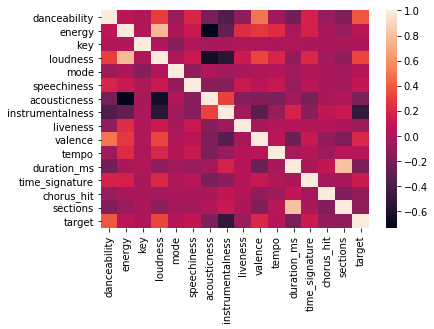

In [19]:
sns.heatmap(dataset.corr()) #correlação


In [20]:
def correlation(dataset, threshold): 
    col_corr = set() 
    corr_matrix = dataset.corr()
    for i in range(len(corr_matrix.columns)):
        for j in range(i):
            if (corr_matrix.iloc[i, j] >= threshold):
                colname = corr_matrix.columns[i] 
                col_corr.add(colname)
    return col_corr

In [21]:
correlation_features = correlation(dataset,0.7)
correlation_features

{'loudness', 'sections'}

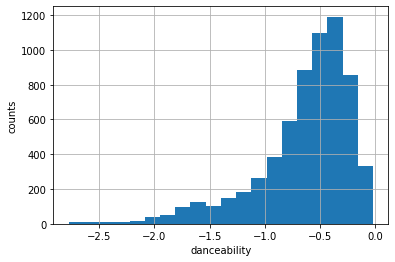

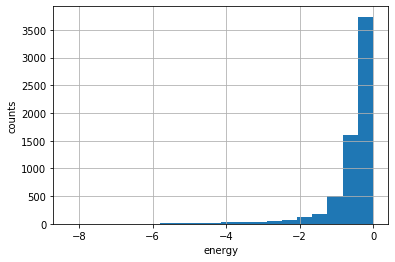

C:\Users\Alane\anaconda3\lib\site-packages\pandas\core\series.py:679: RuntimeWarning: invalid value encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)


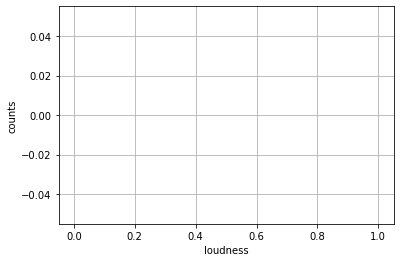

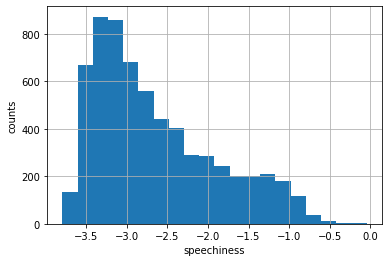

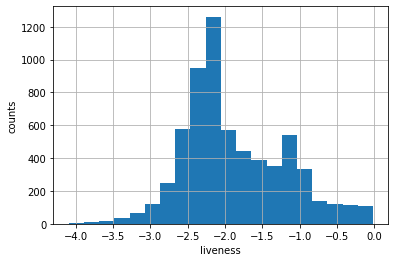

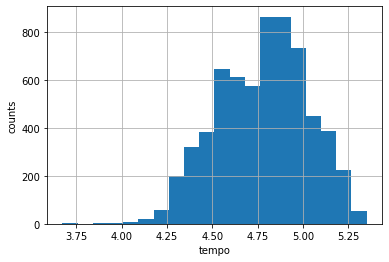

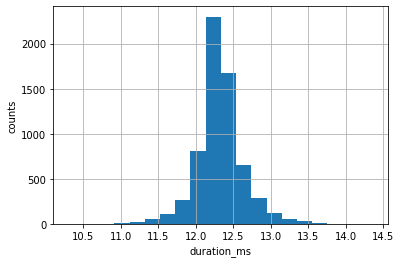

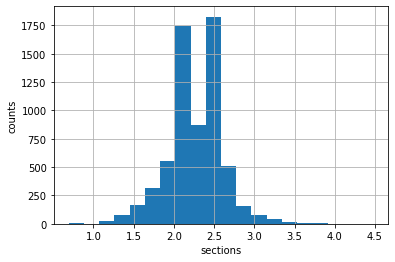

In [22]:
for feature in continuous_feature:
    if 0 in dataset[feature].unique():
        pass
    else:
        dataset[feature] = np.log(dataset[feature])
        dataset[feature].hist(bins=20)
        plt.xlabel(feature)
        plt.ylabel("counts")
        plt.show()

In [23]:
dataset = dataset.drop(["loudness","sections"],axis = 1) 

In [24]:
dataset.describe()

,danceability,energy,key,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_ms,time_signature,chorus_hit,target
count,6398.000000,6398.000000,6398.000000,6398.000000,6398.000000,6398.000000,6398.000000,6398.000000,6398.000000,6398.000000,6398.000000,6398.000000,6398.000000,6398.000000
mean,-0.642573,-0.550080,5.283526,0.645514,-2.652389,0.216928,0.165293,-1.880965,0.443734,4.776565,12.323801,3.930916,41.028399,0.500000
std,0.434815,0.739781,3.606216,0.478395,0.751996,0.296835,0.318736,0.680084,0.245776,0.248864,0.311873,0.377469,19.568827,0.500039
min,-2.777400,-8.290058,0.000000,0.000000,-3.794240,0.000000,0.000000,-4.092347,0.000000,3.672979,10.304041,0.000000,0.000000,0.000000
25%,-0.805197,-0.629234,2.000000,0.000000,-3.248692,0.008533,0.000000,-2.335108,0.240000,4.585898,12.171516,4.000000,28.059135,0.000000
50%,-0.531028,-0.338976,5.000000,1.000000,-2.861201,0.067050,0.000017,-2.071473,0.434000,4.796369,12.307033,4.000000,36.265365,0.500000
75%,-0.342490,-0.154317,8.000000,1.000000,-2.189256,0.311000,0.057650,-1.390302,0.628000,4.949363,12.465805,4.000000,48.292538,1.000000
max,-0.019183,-0.001001,11.000000,1.000000,-0.044997,0.996000,0.995000,-0.018164,0.976000,5.351749,14.366057,5.000000,213.154990,1.000000


In [25]:
feature = [feature for feature in dataset.columns if feature not in ["target","artist","uri","track"]]
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
scaler.fit(dataset[feature])

MinMaxScaler(copy=True, feature_range=(0, 1))

In [26]:
x = scaler.transform(dataset[feature]) #scaling data

In [27]:
dataset.head()

,track,artist,uri,danceability,energy,key,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_ms,time_signature,chorus_hit,target
0,Wild Things,Alessia Cara,spotify:track:2ZyuwVvV6Z3XJaXIFbspeE,-0.299755,-0.468405,1,0,-2.423623,0.02000,0.000,-2.491327,0.706,4.682400,12.146816,4,41.18681,1
1,Surfboard,Esquivel!,spotify:track:61APOtq25SCMuK0V5w2Kgp,-0.805197,-1.398367,5,0,-3.363902,0.87100,0.814,-2.358098,0.250,5.046575,12.083227,3,33.18083,0
2,Love Someone,Lukas Graham,spotify:track:2JqnpexlO9dmvjUMCaLCLJ,-0.597837,-0.879477,9,0,-2.956512,0.16100,0.000,-2.225624,0.274,5.147872,12.233021,4,44.89147,1
3,Music To My Ears (feat. Tory Lanez),Keys N Krates,spotify:track:0cjfLhk8WJ3etPTCseKXtk,-0.689155,-0.433865,0,0,-2.943140,0.00513,0.000,-1.589635,0.291,4.520015,12.170668,4,29.52521,0
4,Juju On That Beat (TZ Anthem),Zay Hilfigerrr & Zayion McCall,spotify:track:1lItf5ZXJc1by9SbPeljFd,-0.214432,-0.119910,1,1,-1.290984,0.00381,0.000,-0.939048,0.780,5.078400,11.879262,4,24.99199,1


In [28]:
data = pd.concat([dataset[["target","artist","uri","track"]].reset_index(drop= True),pd.DataFrame(scaler.transform(dataset[feature]),columns = feature)],axis=1)

In [29]:
data.head()

,target,artist,uri,track,danceability,energy,key,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_ms,time_signature,chorus_hit
0,1,Alessia Cara,spotify:track:2ZyuwVvV6Z3XJaXIFbspeE,Wild Things,0.898278,0.943612,0.090909,0.0,0.365572,0.020080,0.00000,0.392967,0.723361,0.601286,0.453660,0.8,0.193225
1,0,Esquivel!,spotify:track:61APOtq25SCMuK0V5w2Kgp,Surfboard,0.715028,0.831420,0.454545,0.0,0.114780,0.874498,0.81809,0.425668,0.256148,0.818216,0.438006,0.6,0.155665
2,1,Lukas Graham,spotify:track:2JqnpexlO9dmvjUMCaLCLJ,Love Someone,0.790207,0.894020,0.818182,0.0,0.223439,0.161647,0.00000,0.458183,0.280738,0.878556,0.474882,0.8,0.210605
3,0,Keys N Krates,spotify:track:0cjfLhk8WJ3etPTCseKXtk,Music To My Ears (feat. Tory Lanez),0.757100,0.947779,0.000000,0.0,0.227006,0.005151,0.00000,0.614285,0.298156,0.504558,0.459532,0.8,0.138515
4,1,Zay Hilfigerrr & Zayion McCall,spotify:track:1lItf5ZXJc1by9SbPeljFd,Juju On That Beat (TZ Anthem),0.929212,0.985655,0.090909,1.0,0.667670,0.003825,0.00000,0.773971,0.799180,0.837173,0.387793,0.8,0.117248


In [30]:
data.drop(["artist","uri","track"],axis=1,inplace=True) #remove atributos desnecessários


In [31]:
data.head()

,target,danceability,energy,key,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_ms,time_signature,chorus_hit
0,1,0.898278,0.943612,0.090909,0.0,0.365572,0.020080,0.00000,0.392967,0.723361,0.601286,0.453660,0.8,0.193225
1,0,0.715028,0.831420,0.454545,0.0,0.114780,0.874498,0.81809,0.425668,0.256148,0.818216,0.438006,0.6,0.155665
2,1,0.790207,0.894020,0.818182,0.0,0.223439,0.161647,0.00000,0.458183,0.280738,0.878556,0.474882,0.8,0.210605
3,0,0.757100,0.947779,0.000000,0.0,0.227006,0.005151,0.00000,0.614285,0.298156,0.504558,0.459532,0.8,0.138515
4,1,0.929212,0.985655,0.090909,1.0,0.667670,0.003825,0.00000,0.773971,0.799180,0.837173,0.387793,0.8,0.117248


## Selecionando Threshold para Classificação


In [32]:
X = data.iloc[:,1:]
Y = data.iloc[:,[0]]
Y

,target
0,1
1,0
2,1
3,0
4,1
...,...
6393,0
6394,1
6395,1
6396,0


In [33]:
from sklearn.model_selection import train_test_split #separa trieno e teste
x_train,x_test,y_train,y_test = train_test_split(X,Y,test_size=0.2,random_state=30)

In [34]:
from sklearn.datasets import make_classification
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_auc_score

In [35]:
from sklearn.linear_model import LogisticRegression 
lr = LogisticRegression(solver='liblinear')
lr.fit(x_train,y_train)
ytrain_pred = lr.predict_proba(x_train)
ytest_pred = lr.predict_proba(x_test)
print("roc train score :",roc_auc_score(y_train,ytrain_pred[:,1]))
print("roc test score :",roc_auc_score(y_test,ytest_pred[:,1]))

roc train score : 0.8371269641343149
roc test score : 0.8395462347790628


C:\Users\Alane\anaconda3\lib\site-packages\sklearn\utils\validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [36]:
from sklearn.ensemble import RandomForestClassifier
random_model = RandomForestClassifier()
random_model.fit(x_train,y_train)
ytrain_pred = random_model.predict_proba(x_train)
ytest_pred = random_model.predict_proba(x_test)
print("roc train score :",roc_auc_score(y_train,ytrain_pred[:,1]))
print("roc test score :",roc_auc_score(y_test,ytest_pred[:,1]))

C:\Users\Alane\anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


roc train score : 0.9995253825648645
roc test score : 0.9003664989219902


C:\Users\Alane\anaconda3\lib\site-packages\ipykernel_launcher.py:3: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  This is separate from the ipykernel package so we can avoid doing imports until


In [37]:
from sklearn.ensemble import AdaBoostClassifier
ada_model = AdaBoostClassifier()
ada_model.fit(x_train,y_train)
ytrain_pred = ada_model.predict_proba(x_train)
ytest_pred  = ada_model.predict_proba(x_test)
print("roc train score :",roc_auc_score(y_train,ytrain_pred[:,1]))
print("roc test score :",roc_auc_score(y_test,ytest_pred[:,1]))

C:\Users\Alane\anaconda3\lib\site-packages\sklearn\utils\validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


roc train score : 0.9075699342987755
roc test score : 0.8930853544491407


In [38]:
from sklearn.neighbors import KNeighborsClassifier
knn_model = KNeighborsClassifier()
knn_model.fit(x_train,y_train)
ytrain_pred = knn_model.predict_proba(x_train)
ytest_pred  = knn_model.predict_proba(x_test)
print("roc train score :",roc_auc_score(y_train,ytrain_pred[:,1]))
print("roc test score :",roc_auc_score(y_test,ytest_pred[:,1]))

C:\Users\Alane\anaconda3\lib\site-packages\ipykernel_launcher.py:3: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  This is separate from the ipykernel package so we can avoid doing imports until


roc train score : 0.9153957771875771
roc test score : 0.8228437972316024


In [39]:
pred = [] #preve probabilidade de todos os modelos de teste
for model in [lr,random_model,ada_model,knn_model]:
    pred.append(pd.Series(model.predict_proba(x_test)[:,1]))
final_prediction = pd.concat(pred,axis=1).mean(axis=1)
print("test ROC-AUC",roc_auc_score(y_test,final_prediction))

test ROC-AUC 0.8993336605209119


In [40]:
pd.concat(pred,axis=1)

,0,1,2,3
0,0.681685,0.3,0.495108,0.8
1,0.456087,0.4,0.497565,1.0
2,0.841184,0.6,0.506588,1.0
3,0.666391,1.0,0.513040,0.4
4,0.709843,1.0,0.512877,0.8
...,...,...,...,...
1275,0.731032,1.0,0.514139,0.8
1276,0.365491,0.0,0.499713,0.8
1277,0.723330,0.8,0.501418,1.0
1278,0.622039,0.7,0.509730,0.8


In [41]:
from sklearn.metrics import roc_curve, auc
fpr,tpr,threshold = roc_curve(y_test,final_prediction)
threshold

array([1.84485188, 0.84485188, 0.84474936, 0.83644083, 0.83637352,
       0.83588845, 0.83521817, 0.83138582, 0.82982201, 0.81722783,
       0.81699317, 0.78512626, 0.78503471, 0.78208245, 0.7819943 ,
       0.78094236, 0.78074388, 0.78006117, 0.77989333, 0.7668885 ,
       0.76678011, 0.76294838, 0.76283188, 0.75979734, 0.75948487,
       0.75542467, 0.75465868, 0.75457749, 0.75440847, 0.75290395,
       0.75271996, 0.74835678, 0.74822786, 0.7465694 , 0.74648877,
       0.74609383, 0.74574769, 0.7420391 , 0.74160354, 0.73465202,
       0.73460631, 0.73311479, 0.73290779, 0.73007035, 0.72990103,
       0.72818697, 0.72752176, 0.72370781, 0.72370393, 0.71982052,
       0.71981735, 0.70844541, 0.70826174, 0.70813888, 0.70800089,
       0.70686279, 0.7066935 , 0.70277184, 0.70259496, 0.70196596,
       0.7015012 , 0.70095708, 0.70091558, 0.69655262, 0.696273  ,
       0.6946099 , 0.69441206, 0.68765756, 0.68758835, 0.68728004,
       0.68711985, 0.68703939, 0.68697614, 0.68516836, 0.68484

In [42]:
from sklearn.metrics import accuracy_score  #buscando maior precisão com threshold diferente 
accuracy_ls = []
for thres in threshold:
    y_pred = np.where(final_prediction>thres,1,0)
    accuracy_ls.append(accuracy_score(y_test,y_pred,normalize=True))
    
accuracy_ls = pd.concat([pd.Series(threshold),pd.Series(accuracy_ls)],axis=1)
accuracy_ls.columns = ['threshold','accuracy']
accuracy_ls.sort_values(by='accuracy',ascending=False,inplace =True)
accuracy_ls.head()

,threshold,accuracy
234,0.533003,0.832031
231,0.537849,0.831250
232,0.537358,0.831250
233,0.533415,0.831250
235,0.532485,0.831250


In [43]:
accuracy_ls #precisão vs threshold

,threshold,accuracy
234,0.533003,0.832031
231,0.537849,0.831250
232,0.537358,0.831250
233,0.533415,0.831250
235,0.532485,0.831250
...,...,...
5,0.835888,0.507031
2,0.844749,0.506250
0,1.844852,0.505469
1,0.844852,0.505469


## Modelo Final e Resultados

In [44]:
from sklearn.ensemble import RandomForestClassifier #define random forest como modelo final
random_model = RandomForestClassifier( criterion='gini')
random_model.fit(x_train,y_train)
y_pred = random_model.predict(x_test)
print("roc test score :",roc_auc_score(y_test,y_pred))

roc test score : 0.8280360687679923


C:\Users\Alane\anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\Alane\anaconda3\lib\site-packages\ipykernel_launcher.py:3: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  This is separate from the ipykernel package so we can avoid doing imports until


In [45]:
threshold = 0.493468 #melhor threshold para o modelo

predicted_proba = random_model.predict_proba(x_test)
predicted = (predicted_proba [:,1] >= threshold).astype('int')


accuracy = accuracy_score(y_test, predicted)
print(accuracy)

0.8328125


In [46]:
from sklearn.metrics import precision_score, recall_score, f1_score #medindo a performance do modelo
p_score = precision_score(y_test, y_pred)
print('p_score',p_score)
r_score = recall_score(y_test, y_pred)
print('r_score',r_score)
f1 = f1_score(y_test, y_pred)
print('f1 score',f1)

p_score 0.8304
r_score 0.8199052132701422
f1 score 0.8251192368839427


In [47]:
from sklearn.metrics import confusion_matrix #matriz de confusão
pd.DataFrame(confusion_matrix(y_test,y_pred),
             index=['Previsto Não Hit', 'Previsto Hit'],
             columns=['Real Não Hit', 'Real Hit'])
             

,Real Não Hit,Real Hit
Previsto Não Hit,541,106
Previsto Hit,114,519
